[*********************100%***********************]  1 of 1 completed


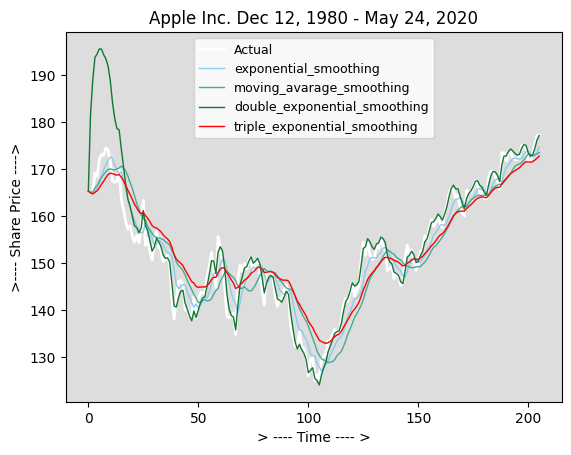

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

def moving_avarage_smoothing(X,k):
	S = np.zeros(X.shape[0])
	for t in range(X.shape[0]):
		if t < k:
			S[t] = np.mean(X[:t+1])
		else:
			S[t] = np.sum(X[t-k:t])/k
	return S

def exponential_smoothing(X,α):
	S = np.zeros(X.shape[0])
	S[0] = X[0]
	for t in range(1,X.shape[0]):
		S[t] = α * X[t-1] + (1- α) * S[t-1]
	return S

def double_exponential_smoothing(X,α,β):
	S,A,B = (np.zeros( X.shape[0] ) for i in range(3))
	S[0] = X[0]
	for t in range(1,X.shape[0]):
		A[t] = α * X[t] + (1- α) * S[t-1]
		B[t] = β * (A[t] - A[t-1]) + (1 - β) * B[t-1]
		S[t] = A[t] + B[t]
	return S

def triple_exponential_smoothing(X,L,α,β,γ,ϕ):

	def sig_ϕ(ϕ,m):
		return np.sum(np.array([np.power(ϕ,i) for i in range(m+1)]))

	C, S, B, F = (np.zeros( X.shape[0] ) for i in range(4))
	S[0], F[0] = X[0], X[0]
	B[0] = np.mean( X[L:2*L] - X[:L] ) / L
	m = 12
	sig_ϕ = sig_ϕ(ϕ,m)
	for t in range(1, X.shape[0]):
		S[t] = α * (X[t] - C[t % L]) + (1 - α) * (S[t-1] + ϕ * B[t-1])
		B[t] = β * (S[t] - S[t-1]) + (1-β) * ϕ * B[t-1]
		C[t % L] = γ * (X[t] - S[t]) + (1 - γ) * C[t % L]
		F[t] = S[t] + sig_ϕ * B[t] + C[t % L]
	return S
apple='AAPL'
AAPL=yf.download(apple,start='2021-01-01', end='2023-06-1', period='1d')['Close']
AAPL=pd.DataFrame(AAPL)
AAPL
#dataset loading
# AAPL = pd.read_csv('./datasets/AAPL.csv')

#smoothing techiniques
time_series = np.array(AAPL['Close'])[400:]
# print(time_series)
m_a_s = moving_avarage_smoothing(time_series,12)
e_s = exponential_smoothing(time_series,0.3)
d_e_s = double_exponential_smoothing(time_series,0.5,0.1)
t_e_s = triple_exponential_smoothing(time_series,12,0.1,0.1,0.1,0.5)

#data plots
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax = plt.gca()
ax.set_facecolor('#dddddd')

plt.title('Apple Inc. Dec 12, 1980 - May 24, 2020')
plt.xlabel("> ---- Time ---- >")
plt.ylabel(">---- Share Price ---->")

plt.plot(time_series,linewidth = 2,label="Actual",color='white')
plt.plot(e_s,linewidth=1,label="exponential_smoothing",color="#88CCEE")
plt.plot(m_a_s,linewidth=1,label="moving_avarage_smoothing",color="#44AA99")
plt.plot(d_e_s,linewidth=1,label="double_exponential_smoothing",color="#117733")
plt.plot(t_e_s,linewidth=1,label="triple_exponential_smoothing",color="red")

plt.legend(fontsize=9)
plt.show()